# Feature Selection

In [86]:
import math
import scipy as sp
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor

import warnings
import os

In [3]:
# data_path = '../raw_data/additional'
df_blockchain = pd.read_csv(os.path.join('final_df_2016.csv'), index_col=0 ,parse_dates=True)

In [8]:
data_path = '../raw_data/additional'
target = pd.read_csv(os.path.join(data_path, 'coinbase_2014-2021.csv'), index_col=0 ,parse_dates=True)

In [10]:
data_path = '../'
df_financial = pd.read_csv(os.path.join(data_path, 'financials_dataframe.csv'), index_col=0 ,parse_dates=True)

In [16]:
#df_financial.interpolate(method='linear',axis=0)

## Cleaning dataset

In [26]:
df_blockchain.drop(columns=['n-payments','n-payments-per-block'],inplace=True)

In [54]:
df_tot = pd.concat([df_blockchain,df_financial],axis=1).loc['2016-06-11':]


In [55]:
df_tot.interpolate(method='linear',axis=0, inplace=True)

### Scaling dataset

In [56]:
df_features_scaled = df_tot.copy()

#substituting unscaled feature values by scaled values using sklearn StandardScaler
scaler = StandardScaler()
df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features_scaled),columns=df_tot.columns, 
                                  index = df_tot.index)

In [131]:
df_features_scaled = df_features_scaled.dropna()
df_features_scaled.index.min()
y = target.loc['2016-06-30':][['volume_gross']]

## Feature Permutation

### Linear regression

In [92]:
from sklearn.inspection import permutation_importance


model_lr = search.best_estimator_.fit(df_features_scaled, y) # Fit model

permutation_score_lr = permutation_importance(model_lr, df_features_scaled, y, n_repeats=100) # Perform Permutation

importance_df_lr = pd.DataFrame(np.vstack((df_features_scaled.columns,
                                        permutation_score_lr.importances_mean)).T) # Unstack results

importance_df_lr.columns=['feature','feature importance'] # Change column names

importance_df_lr.sort_values(by="feature importance", ascending = False) # Order by importance


/Users/michelangelodalessandro/.pyenv/versions/btc_sent_fc/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+20, tolerance: 1.114e+17
  model = cd_fast.enet_coordinate_descent(


,feature,feature importance
22,NASDAQ Composite Index (^COMP) - Index Value,4.143945
32,S&P Short Term Taxable Municipal Bond Index,2.196997
19,Russell 2000 Index (RUT) - Index Value,1.985553
34,S&P U.S. Treasury Bond Current 2-Year Index,1.919472
30,S&P U.S. Treasury Bond Current 30-Year Index,1.483671
36,S&P U.S. TIPS 0-1 Year Index (USD),1.374856
23,Dow Jones Industrial Average (^DJI) - Index Value,1.149593
55,S&P U.S. TIPS 5-7 Year Index (USD),0.981039
37,S&P U.S. Treasury Bond 20+ Year Index,0.848732
25,S&P U.S. Treasury Bill 0-3 Month Index,0.64031


### Random Forest

In [80]:


model = RandomForestRegressor().fit(df_features_scaled, y) # Fit model

permutation_score = permutation_importance(model, df_features_scaled, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((df_features_scaled.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance


/var/folders/_7/1qybpm6d189fgcny886gkv880000gn/T/ipykernel_77274/1352425136.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestRegressor().fit(df_features_scaled, y) # Fit model


,feature,feature importance
36,S&P U.S. TIPS 0-1 Year Index (USD),0.396672
17,transaction-fees-usd,0.128764
4,nvt,0.126427
18,active_account,0.054381
2,utxo-count,0.050788
50,S&P U.S. Treasury Bond 7-10 Year Index (TTM JPY),0.044625
7,n-unique-addresses,0.038434
9,miners-revenue,0.024811
39,S&P Municipal Yield Index,0.019884
21,S&P 500 (^SPX) - Index Value,0.017889


## Recursive Feature Selection

In [ ]:
pipe = Pipeline()

## Gridsearch 

In [87]:
model = Lasso()

# Hyperparameter Grid
grid = {'alpha': np.linspace(0.1,1,10)}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(df_features_scaled, y)

/Users/michelangelodalessandro/.pyenv/versions/btc_sent_fc/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+20, tolerance: 1.114e+17
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [89]:
search.best_estimator_


Lasso(alpha=0.1)

## Extract important features

In [110]:
importance_df.sort_values(by="feature importance", ascending = False) # Order by importance
important_columns = importance_df[importance_df['feature importance'] > 0.01]['feature'].values



## Sarimax

In [228]:
X = df_tot[important_columns].dropna()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),
                             columns=X.columns,
                             index= X.index)
X_scaled.index.min()


Timestamp('2016-06-13 00:00:00', freq='D')

In [231]:
y = target.loc['2016-06-13':][['volume_gross']]

In [232]:
df = y.copy()

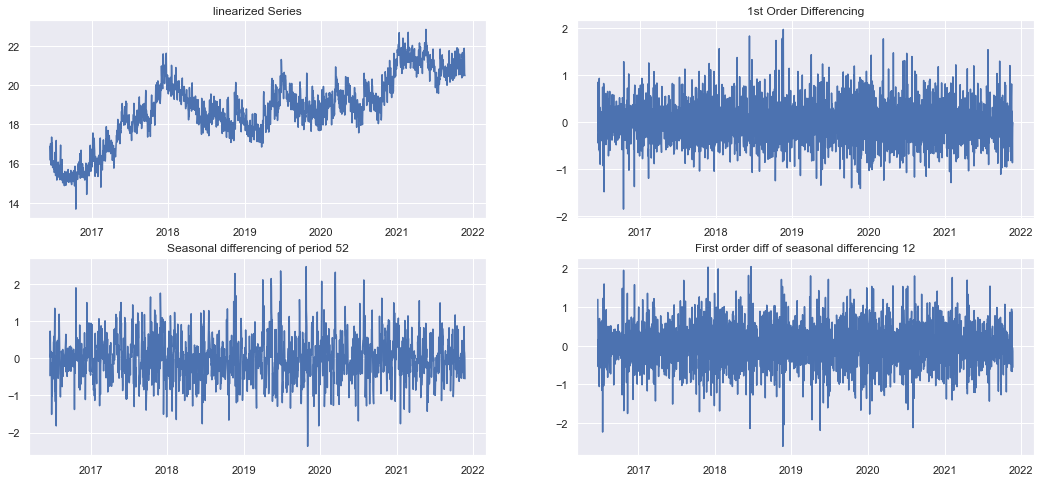

In [242]:
fig, axs = plt.subplots(2, 2, figsize=(18,8))
# keeping just log transform to stay ~ linear
df['log'] = np.log(df.values)

# linearized series
axs[0,0].plot(df.log); axs[0,0].set_title('linearized Series')

# Normal differencing
axs[0,1].plot(df.log.diff(1)); axs[0,1].set_title('1st Order Differencing')

# Seasonal differencing
axs[1,0].plot(df.log.diff(7))
axs[1,0].set_title('Seasonal differencing of period 52')

# Sesonal + Normal differencing
axs[1,1].plot(df.log.diff(7).diff(1))
axs[1,1].set_title('First order diff of seasonal differencing 12');


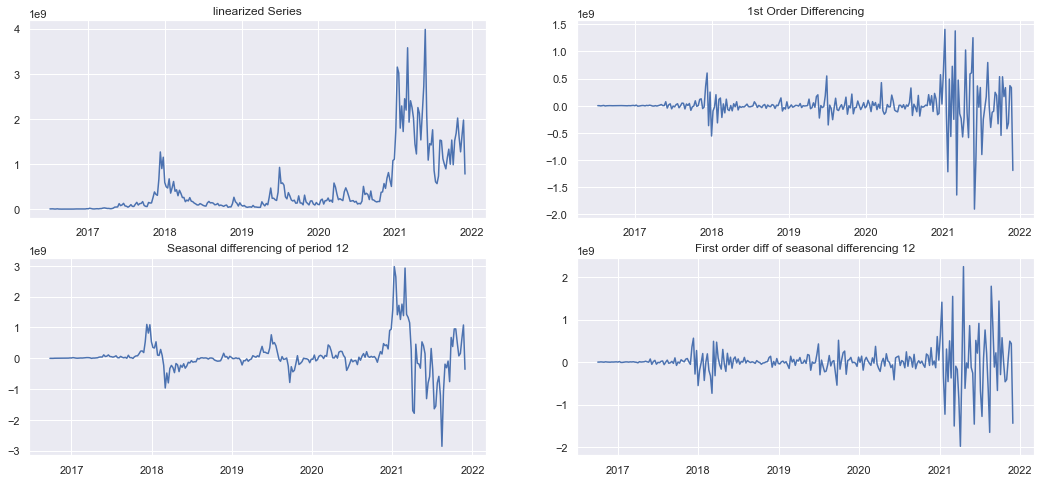

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(18,8))
# keeping just log transform to stay ~ linear
df['log'] = df.values

# linearized series
axs[0,0].plot(df.log); axs[0,0].set_title('linearized Series')

# Normal differencing
axs[0,1].plot(df.log.diff(1)); axs[0,1].set_title('1st Order Differencing')

# Seasonal differencing
axs[1,0].plot(df.log.diff(12))
axs[1,0].set_title('Seasonal differencing of period 12')

# Sesonal + Normal differencing
axs[1,1].plot(df.log.diff(12).diff(1))
axs[1,1].set_title('First order diff of seasonal differencing 12');

In [ ]:
# We define here a "Plot forecast vs. real", which also shows historical train set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    plt.xlim()
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);
    

In [234]:
df['log'] = np.log(df.values)

In [238]:
len(df['log'])*0.75

1491.75

In [258]:
train = df['log'][0:1492]
test = df['log'][1492:]


In [241]:
# Auto-fit the best SARIMAX with help from this exogenous time series
import pmdarima as pm
sarimax = pm.auto_arima(df['log'], exogenous=X_scaled,
                           start_p=0, start_q=0,
                           test='adf',d=1,
                           max_p=3, max_q=3,m=7,
                           start_P=0, seasonal=True,
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=2292.311, Time=7.67 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2299.228, Time=3.51 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2109.416, Time=9.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1893.260, Time=8.41 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2298.320, Time=1.04 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1892.986, Time=5.46 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1893.226, Time=6.95 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1863.751, Time=8.74 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=1832.581, Time=14.74 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=1885.994, Time=13.95 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=1799.394, Time=15.04 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=1839.174, Time=15.03 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=14.09 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=1777.763, Time=17.74 sec
 ARIMA(1,1,1)(1,0,2)[7] intercep

In [244]:
sarimax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1989
Model:             SARIMAX(3, 1, 1)x(2, 0, [1, 2], 7)   Log Likelihood                -833.161
Date:                                Wed, 24 Nov 2021   AIC                           1716.322
Time:                                        21:58:28   BIC                           1856.194
Sample:                                    06-13-2016   HQIC                          1767.696
                                         - 11-22-2021                                         
Covariance Type:                                  opg                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
intercept                                            0.0002      0.000      1.068      0.285      -0.000       0.000
utxo-count                                          -0.7693      0.387     -1.990      0.047      -1.527      -0.012
mvrv                                                 0.1991      0.067      2.981      0.003       0.068       0.330
nvt                                                 -0.1516      0.023     -6.695      0.000      -0.196      -0.107
n-transactions-excluding-popular                     0.0186      0.029      0.630      0.529      -0.039       0.076
n-unique-addresses                                   0.1824      0.036      5.002      0.000       0.111       0.254
miners-revenue                                      -0.0544      0.084     -0.647      0.518      -0.219       0.110
mempool-growth                                       0.0074      0.010      0.743      0.457      -0.012       0.027
transaction-fees-usd                                 0.1524      0.034      4.489      0.000       0.086       0.219
active_account                                       0.1771      0.025      6.953      0.000       0.127       0.227
S&P 500 (^SPX) - Index Value                        -0.2347      0.445     -0.527      0.598      -1.107       0.637
NASDAQ Composite Index (^COMP) - Index Value         0.0497      0.563      0.088      0.930      -1.054       1.153
S&P Short Term Taxable Municipal Bond Index         -1.4420      1.939     -0.744      0.457      -5.243       2.359
S&P U.S. TIPS 0-1 Year Index (USD)                  -0.7314      0.690     -1.061      0.289      -2.083       0.620
S&P Municipal Yield Index                           -0.1604      0.237     -0.675      0.499      -0.626       0.305
S&P U.S. Treasury Bond 7-10 Year Index (TTM JPY)    -0.4551      0.140     -3.241      0.001      -0.730      -0.180
ar.L1                                                0.4140      0.028     14.646      0.000       0.359       0.469
ar.L2                                                0.0099      0.027      0.362      0.717      -0.044       0.064
ar.L3                                                0.0670      0.025      2.632      0.008       0.017       0.117
ma.L1                                               -0.9020      0.018    -50.896      0.000      -0.937      -0.867
ar.S.L7                                              0.1921      0.606      0.317      0.751      -0.996       1.380
ar.S.L14                                             0.7590      0.589      1.289      0.197      -0.395       1.913
ma.S.L7                                             -0.1364      0.595     -0.229      0.819      -1.303       1.030
ma.S.L14                                            -0.

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build Model
# ARIMA(3,1,1)(2,0,2)[7]
sarima = SARIMAX(train, exogenous= X_scaled.iloc[:1492,:], 
                 order=(3, 1, 1),seasonal_order=(2,0,2,7))

sarima = sarima.fit()

# Forecast
results = sarima.get_forecast(len(test), alpha=0.05)
forecast = results.predicted_mean
confidence_int = results.conf_int()

/Users/michelangelodalessandro/.pyenv/versions/btc_sent_fc/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/michelangelodalessandro/.pyenv/versions/btc_sent_fc/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47488D-01    |proj g|=  2.66192D-01

At iterate    5    f=  5.25686D-01    |proj g|=  3.80232D-02

At iterate   10    f=  4.79368D-01    |proj g|=  3.50330D-02

At iterate   15    f=  4.76898D-01    |proj g|=  2.28311D-03

At iterate   20    f=  4.76765D-01    |proj g|=  8.49367D-04

At iterate   25    f=  4.76758D-01    |proj g|=  2.04628D-03

At iterate   30    f=  4.76754D-01    |proj g|=  1.46069D-03

At iterate   35    f=  4.76741D-01    |proj g|=  3.67508D-03

At iterate   40    f=  4.76738D-01    |proj g|=  7.38081D-04

At iterate   45    f=  4.76738D-01    |proj g|=  5.33519D-05


/Users/michelangelodalessandro/.pyenv/versions/btc_sent_fc/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  4.76738D-01    |proj g|=  1.39961D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   1.400D-04   4.767D-01
  F =  0.47673760059329906     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


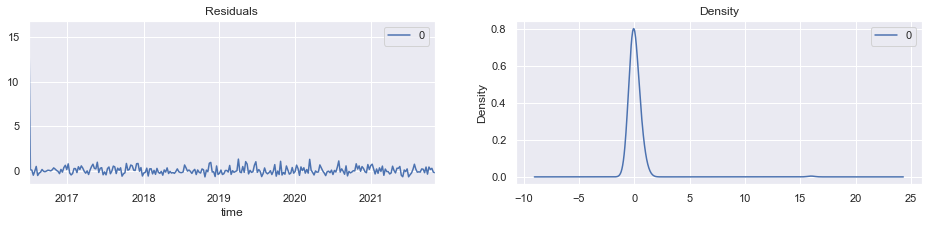

In [208]:
residuals = pd.DataFrame(sarima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);

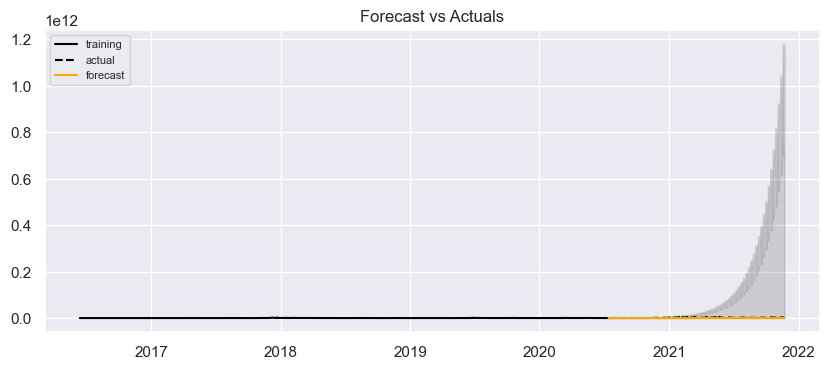

In [262]:
# Reconstruct by taking exponential
forecast_recons = pd.Series(np.exp(forecast), index = test.index)
lower_recons = np.exp(confidence_int['lower log']).values
upper_recons = np.exp(confidence_int['upper log']).values

plot_forecast(forecast_recons, np.exp(train), np.exp(test), 
              upper = upper_recons, lower=lower_recons)


In [245]:
result_mul = seasonal_decompose(df.log, model='multiplicative')

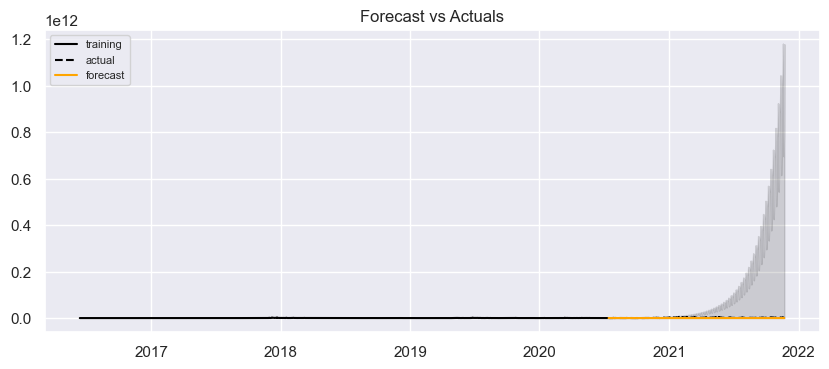

In [263]:
# re-compose back to initial time series

forecast_recons = np.exp(forecast)*result_mul.seasonal[1492:]
train_recons = np.exp(train)*result_mul.seasonal[0:1492]
test_recons = np.exp(test)*result_mul.seasonal[1492:]
lower_recons = np.exp(confidence_int['lower log']).values
upper_recons = np.exp(confidence_int['upper log']).values


# plt 
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons, upper_recons)


In [274]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(np.log(X['nvt'])[-497:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')


## Seasonal decomposition

In [265]:
len(test)

497

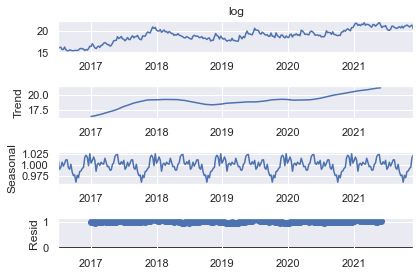

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul = seasonal_decompose(df.log, model='multiplicative')
result_mul.plot();


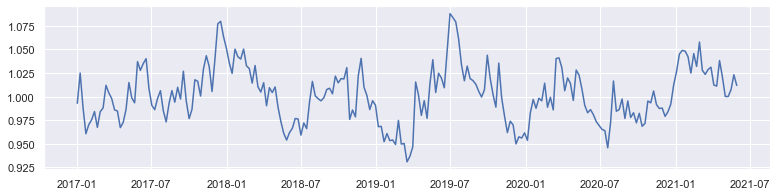

In [184]:
# Plot the residuals with "result_add.resid" to decide
f = plt.figure(figsize=(13,3))
plt.plot(result_mul.resid);



## Seasonality 
    - working on log Gross weekly volumes and FIRST order diff it is possible to achieve a very low ADF p-value

In [202]:
from statsmodels.tsa.stattools import adfuller

adfuller(df.log.diff().dropna())[1]  # p-value

7.254611010750092e-23

In [190]:
print('multipl resid: ', adfuller(result_mul.resid.dropna())[1])

multipl resid:  9.1575615358879e-05


In [205]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.log)

1